# Machine Learning Nanodegree Capstone Project

Every year, approximately 7.6 million companion animals end up in US shelters. Many animals are given up as unwanted by their owners, while others are picked up after getting lost or taken out of cruelty situations. Many of these animals find forever families to take them home, but just as many are not so lucky. 

Approximately 2.7 million shelter animals are euthanized in the US every year.

In this multi-class classification problem, a dataset of intake information (breed, color, sex, age, etc.) provided by the Austin Animal Center will be used to train a supervised learning algorithm. The trained model will then be utilized to help predict the outcome (adoption, died, euthanasia, return to owner or transfer) of future shelter animals.

Knowing the predicted outcomes can help shelters identify and understand trends in animal outcomes. Such insights could help shelters focus their resources on specific animals who might need extra help finding a new home. For example, if the predicted outcome for a certain animal or breed in a shelter is euthanasia, the shelter could align their efforts to help see these euthanasia candidates find a new home.

I intend to follow the workflow outline below as closely as possible:

- Step 1: Problem Preparation
  - Load libraries
  - Load dataset

- Step 2: Data Summarization
  - Descriptive statistics such as .info(), .describe(), .head() and .shape
  - Data visualization such as histograms, density plots, box plots, scatter matrix and correlation matrix

- Step 3: Data Preparation
  - Data cleaning such as handling missing values
  - Feature preparation and data transforms such as one-hot encoding

- Step 4: Evaluate Algorithm(s)
  - Split-out validation dataset
  - Test options and evaluation metric
  - Spot check and compare algorithms

- Step 5: Improve Algorithm(s)
  - Algorithm tuning
  - Compare selected algorithm against Ensembles

- Step 6: Model Finalization
  - Predictions on validation / test dataset

## Problem Preparation

In this step, I am loading the necessary Python libraries and dataset.

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import util
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
%matplotlib inline

# Load dataset
filepath = 'data/train.csv'
data = pd.read_csv(filepath)

## Data Exploration

My aim was to learn more about the data through descriptive statistics and data visualization. I utilized info(), describe(), head(), shape along with value_counts, isnull() and class distribution. Regarding data visualization, I plotted two bar charts and one line chart.

In [2]:
# Displaying the first five records of the dataset
data.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [3]:
# Displaying the dimensions of the dataset
print('Number of observations: %s' % data.shape[0])
print('Number of attributes: {}'.format(data.shape[1]))

Number of observations: 26729
Number of attributes: 10


In [4]:
# Displaying detailed information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(10)
memory usage: 2.0+ MB


In [5]:
y = data['AnimalType'].value_counts()
y

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

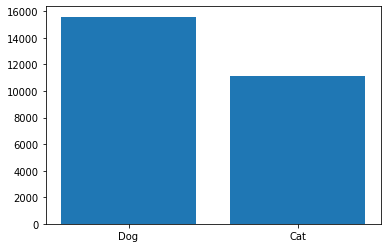

In [6]:
x = ['Dog', 'Cat']
plt.bar(x, y)
plt.show()

In [7]:
y = data['SexuponOutcome'].value_counts()
y

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64

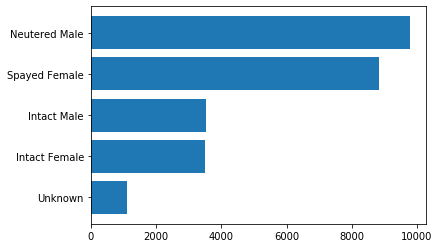

In [8]:
fig, ax = plt.subplots()
sex = ['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female', 'Unknown']
y_pos = np.arange(len(sex))
ax.barh(y_pos, y)
ax.set_yticks(y_pos)
ax.set_yticklabels(sex)
ax.invert_yaxis()
plt.show()

In [9]:
data['AgeuponOutcome'].value_counts()

1 year       3969
2 years      3742
2 months     3397
3 years      1823
1 month      1281
3 months     1277
4 years      1071
5 years       992
4 months      888
6 years       670
3 weeks       659
5 months      652
6 months      588
8 years       536
7 years       531
2 weeks       529
10 months     457
10 years      446
8 months      402
4 weeks       334
7 months      288
9 years       288
12 years      234
9 months      224
1 weeks       171
11 months     166
1 week        146
13 years      143
11 years      126
3 days        109
2 days         99
14 years       97
15 years       85
1 day          66
6 days         50
4 days         50
16 years       36
5 days         24
0 years        22
17 years       17
5 weeks        11
18 years       10
19 years        3
20 years        2
Name: AgeuponOutcome, dtype: int64

In [10]:
data['Breed'].value_counts()

Domestic Shorthair Mix                          8810
Pit Bull Mix                                    1906
Chihuahua Shorthair Mix                         1766
Labrador Retriever Mix                          1363
Domestic Medium Hair Mix                         839
German Shepherd Mix                              575
Domestic Longhair Mix                            520
Siamese Mix                                      389
Australian Cattle Dog Mix                        367
Dachshund Mix                                    318
Boxer Mix                                        245
Miniature Poodle Mix                             233
Border Collie Mix                                229
Australian Shepherd Mix                          163
Rat Terrier Mix                                  157
Catahoula Mix                                    157
Jack Russell Terrier Mix                         146
Yorkshire Terrier Mix                            143
Domestic Shorthair                            

In [11]:
data['Color'].value_counts()

Black/White                    2824
Black                          2292
Brown Tabby                    1635
Brown Tabby/White               940
White                           931
Brown/White                     884
Orange Tabby                    841
Tan/White                       773
Tricolor                        752
Blue/White                      702
Black/Tan                       672
White/Black                     643
Brown                           639
Tan                             628
White/Brown                     569
Tortie                          530
Calico                          517
Orange Tabby/White              455
Brown Brindle/White             450
Blue                            450
Black/Brown                     436
Blue Tabby                      433
White/Tan                       389
Red                             337
Torbie                          335
Brown/Black                     333
Red/White                       331
Blue Tabby/White            

In [12]:
# Identify which observations are null for the AgeuponOutcome feature
data.AgeuponOutcome[data.AgeuponOutcome.isnull()]

2480     NaN
2912     NaN
3766     NaN
3875     NaN
4498     NaN
5137     NaN
5691     NaN
7005     NaN
8420     NaN
17464    NaN
18490    NaN
19927    NaN
21523    NaN
22380    NaN
22448    NaN
24328    NaN
26551    NaN
26570    NaN
Name: AgeuponOutcome, dtype: object

In [13]:
# Identify which observation is null for the SexuponOutcome feature
data.SexuponOutcome[data.SexuponOutcome.isnull()]

3174    NaN
Name: SexuponOutcome, dtype: object

In [14]:
# Display class distribution
y = data.groupby('OutcomeType').size()
y

OutcomeType
Adoption           10769
Died                 197
Euthanasia          1555
Return_to_owner     4786
Transfer            9422
dtype: int64

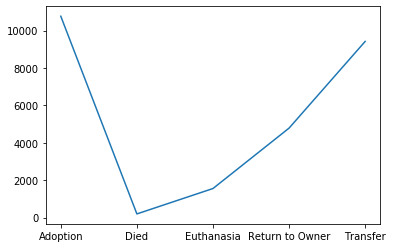

In [15]:
x = ['Adoption', 'Died', 'Euthanasia', 'Return to Owner', 'Transfer']
plt.plot(x, y)

## Data Preparation

For data preparation, I decided to move forward with three dataframes: Cat, Dog and Animal.

- Cat contains only Cats
- Dog contains only Dogs
- Animal contains Cats and Dogs

### Cat

In [16]:
# Create new dataframe
cat = data.copy()

# Narrow dataframe to 'Cat' only
cat = cat[cat['AnimalType'] == 'Cat']

# Drop observations from features with NaN
cat = cat.dropna(subset=['AgeuponOutcome', 'SexuponOutcome'])

# Filter out observations with 'Unknown'
cat = cat[cat.SexuponOutcome != 'Unknown']

# Cat names below threshold are replaced with 'Known'
cat_names = cat['Name'].value_counts()
cat_names = cat_names[cat_names < 50]
cat_names = list(cat_names.index)
cat['Name'].replace(to_replace=cat_names, value='Known', inplace=True)

# Cat names with NaN replaced with 'Unknown'
cat['Name'] = cat['Name'].fillna('Unknown')

# Split dataset into features and target variable
cat_y = cat[['OutcomeType']]
cat = cat.drop(['AnimalID', 'DateTime', 'OutcomeType', 'OutcomeSubtype'], axis=1)

# Convert age to number of days
cat['AgeuponOutcome'] = cat['AgeuponOutcome'].apply(util.convertAgeToDays)

# 'Mix' and '/' removed from Breed and Color features
cat['Breed'] = cat['Breed'].apply(util.getBreed)
cat['Color'] = cat['Color'].apply(util.getColor)

# Cat breeds below threshold are replaced with 'Other'
cat_breeds = cat['Breed'].value_counts()
cat_breeds = cat_breeds[cat_breeds < 50]
cat_breeds = list(cat_breeds.index)
cat['Breed'].replace(to_replace=cat_breeds, value='Other', inplace=True)

# Cat colors below threshold are replaced with 'Other'
cat_colors = cat['Color'].value_counts()
cat_colors = cat_colors[cat_colors < 50]
cat_colors = list(cat_colors.index)
cat['Color'].replace(to_replace=cat_colors, value='Other', inplace=True)

# Scale AgeuponOutcome for Cats
scaler = MinMaxScaler()
cat_scaled = pd.DataFrame(data=cat)
numerical = ['AgeuponOutcome']
cat_scaled[numerical] = scaler.fit_transform(cat[numerical])

# Implement one-hot encoding for categorical features
cat_final = pd.get_dummies(cat_scaled)

### Dog

In [17]:
# Create new dataframe
dog = data.copy()

# Narrow dataframe to 'Dog' only
dog = dog[dog['AnimalType'] == 'Dog']

# Drop observations from features with NaN
dog = dog.dropna(subset=['AgeuponOutcome', 'SexuponOutcome'])

# Filter out observations with 'Unknown'
dog = dog[dog['SexuponOutcome'] != 'Unknown']

# Dog names below threshold are replaced with 'Known'
dog_names = dog['Name'].value_counts()
dog_names = dog_names[dog_names < 200]
dog_names = list(dog_names.index)
dog['Name'].replace(to_replace=dog_names, value='Known', inplace=True)

# Dog names with NaN replaced with 'Unknown'
dog['Name'] = dog['Name'].fillna('Unknown')

# Split dataset into features and target variable
dog_y = dog[['OutcomeType']]
dog = dog.drop(['AnimalID', 'DateTime', 'OutcomeType', 'OutcomeSubtype'], axis=1)

# Convert AgeuponOutcome to number of days
dog['AgeuponOutcome'] = dog['AgeuponOutcome'].apply(util.convertAgeToDays)

# 'Mix' and '/' removed from Breed and Color features
dog['Breed'] = dog['Breed'].apply(util.getBreed)
dog['Color'] = dog['Color'].apply(util.getColor)

# Dog breeds below threshold are replaced with 'Other'
dog_breeds = dog['Breed'].value_counts()
dog_breeds = dog_breeds[dog_breeds < 50]
dog_breeds = list(dog_breeds.index)
dog['Breed'].replace(to_replace=dog_breeds, value='Other', inplace=True)

# Dog colors below threshold are replaced with 'Other'
dog_colors = dog['Color'].value_counts()
dog_colors = dog_colors[dog_colors < 50]
dog_colors = list(dog_colors.index)
dog['Color'].replace(to_replace=dog_colors, value='Other', inplace=True)

# Scale AgeuponOutcome for Dogs
scaler = MinMaxScaler()
dog_scaled = pd.DataFrame(data=dog)
numerical = ['AgeuponOutcome']
dog_scaled[numerical] = scaler.fit_transform(dog[numerical])

# Implement one-hot encoding for categorical features
dog_final = pd.get_dummies(dog_scaled)

### Animal (Cat and Dog Combined)

In [18]:
# Create new dataframe
animal = data.copy()

# Remove rows from dataset that have null for specified features
animal = animal.dropna(subset=['AgeuponOutcome', 'SexuponOutcome'])
animal = animal[animal.SexuponOutcome != 'Unknown']

# Animal names below threshold are replaced with 'Known'
animal_names = animal['Name'].value_counts()
animal_names = animal_names[animal_names < 100]
animal_names = list(animal_names.index)
animal['Name'].replace(to_replace=dog_names, value='Known', inplace=True)

# Animal names with NaN replaced with 'Unknown'
animal['Name'] = animal['Name'].fillna('Unknown')

# Split dataset into features and target variable
animal_y = animal[['OutcomeType']]
animal = animal.drop(['AnimalID', 'DateTime', 'OutcomeType', 'OutcomeSubtype'], axis=1)

# Convert AgeuponOutcome to number of days
animal['AgeuponOutcome'] = animal['AgeuponOutcome'].apply(util.convertAgeToDays)

# 'Mix' and '/' removed from Breed and Color features
animal['Breed'] = animal['Breed'].apply(util.getBreed)
animal['Color'] = animal['Breed'].apply(util.getColor)

# Animal breeds below threshold are replaced with 'Other'
animal_breeds = animal['Breed'].value_counts()
animal_breeds = animal_breeds[animal_breeds < 50]
animal_breeds = list(animal_breeds.index)
animal['Breed'].replace(to_replace=animal_breeds, value='Other', inplace=True)

# Animal breeds below threshold are replaced with 'Other'
animal_colors = animal['Color'].value_counts()
animal_colors = animal_colors[animal_colors < 50]
animal_colors = list(animal_colors.index)
animal['Color'].replace(to_replace=animal_colors, value='Other', inplace=True)

# Scale AgeuponOutcome
scaler = MinMaxScaler()
animal_scaled = pd.DataFrame(data=animal)
numerical = ['AgeuponOutcome']
animal_scaled[numerical] = scaler.fit_transform(animal[numerical])

# Implement one-hot encoding for categorical features
animal_final = pd.get_dummies(animal_scaled)

## Evaluate Algorithms

For algorithm evaluation, I used a 60/40 training/validation dataset split. The two evaluation metrics used were accuracy and F1 score. I used k-fold cross validation.

For my benchmark, I used a Logistic Regression algorithm.

The Machine Learning algorithms I decided to use were:
- Decision Tree
- KNeighbors
- XGBoost
- Naive Bayes
- Support-Vector Machines

In [20]:
def modelSelection(final_x, final_y):
    
    # Split into train and test set
    X_train, X_test, y_train, y_test = train_test_split(final_x, final_y, test_size=0.40, random_state=42)

    # Spot-check algorithms
    models = []
    models.append(('LG', LogisticRegression(solver='liblinear', multi_class='ovr'))) # Benchmark model
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('XGB', XGBClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(gamma='auto')))

    results = []
    names = []

    for name, model in models:
        kfold = KFold(n_splits=5, random_state=42)
        cv_results = cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
    
        print('{}: {}'.format(name, cv_results.mean()))

In [21]:
modelSelection(cat_final, cat_y)

LG: 0.7234051352373491
CART: 0.7179624475225759
KNN: 0.7062483165051872
XGB: 0.7433612487382292
NB: 0.31865570728548537
SVM: 0.7204372869273736


In [22]:
modelSelection(dog_final, dog_y)

LG: 0.5616076154152941
CART: 0.5186371740358804
KNN: 0.5105825898899393
XGB: 0.5632189593504757
NB: 0.0755192656547333
SVM: 0.5360405889214477


In [23]:
modelSelection(animal_final, animal_y)

LG: 0.6286750136206631
CART: 0.6092891970949638
KNN: 0.6026535273550524
XGB: 0.6398642482716304
NB: 0.02485056413348779
SVM: 0.5854146658838092


## Algorithm Improvement

In order to improve the algorithm, I used hyperparameter tuning and Ensemble method comparison.

The Ensemble methods I decided to use were:
- AdaBoost
- Gradient Boosting
- Random Forest
- Extra Trees


In [25]:
# Cat
depth = [6, 7]
gamma = [0, 0.5, 1]
child_weight = [1, 2, 3]
sample = [0.25, 0.50, 0.75]
param_grid = dict(max_depth=depth, min_child_weight=child_weight, subsample=sample, gamma=gamma)
model = XGBClassifier()
kfold = KFold(n_splits=5, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold, iid=True)
grid_result = grid.fit(cat_final, cat_y.values.ravel())

print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f, (%f) with: %r' % (mean, stdev, param))

Best: 0.737655 using {'gamma': 1, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.25}
0.733399, (0.004168) with: {'gamma': 0, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.25}
0.733894, (0.001342) with: {'gamma': 0, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.5}
0.733894, (0.002875) with: {'gamma': 0, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.75}
0.734092, (0.004298) with: {'gamma': 0, 'max_depth': 6, 'min_child_weight': 2, 'subsample': 0.25}
0.735972, (0.002396) with: {'gamma': 0, 'max_depth': 6, 'min_child_weight': 2, 'subsample': 0.5}
0.734884, (0.002531) with: {'gamma': 0, 'max_depth': 6, 'min_child_weight': 2, 'subsample': 0.75}
0.736863, (0.005040) with: {'gamma': 0, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.25}
0.736665, (0.003641) with: {'gamma': 0, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.5}
0.735477, (0.001814) with: {'gamma': 0, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.75}
0.729936, (0.004238) with: {'

In [ ]:
# Dog
depth = [6, 7]
gamma = [0, 0.5, 1]
child_weight = [1, 2, 3]
sample = [0.25, 0.50, 0.75]
param_grid = dict(max_depth=depth, min_child_weight=child_weight, subsample=sample, gamma=gamma)
model = XGBClassifier()
kfold = KFold(n_splits=5, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold, iid=True)
grid_result = grid.fit(dog_final, dog_y.values.ravel())

print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f, (%f) with: %r' % (mean, stdev, param))

In [ ]:
# Animal
depth = [6, 7]
gamma = [0, 0.5, 1]
child_weight = [1, 2, 3]
sample = [0.25, 0.50, 0.75]
param_grid = dict(max_depth=depth, min_child_weight=child_weight, subsample=sample, gamma=gamma)
model = XGBClassifier()
kfold = KFold(n_splits=5, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold, iid=True)
grid_result = grid.fit(animal_final, animal_y.values.ravel())

print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f, (%f) with: %r' % (mean, stdev, param))

In [ ]:
def modelEnsemble(final_x, final_y):
    
    # Split into train and test set
    X_train, X_test, y_train, y_test = train_test_split(final_x, final_y, test_size=0.40, random_state=42)

    # Ensembles
    ensembles = []
    ensembles.append(('AB', AdaBoostClassifier()))
    ensembles.append(('GBM', GradientBoostingClassifier()))
    ensembles.append(('RF', RandomForestClassifier(n_estimators=5)))
    eensembles.append(('ET', ExtraTreesClassifier(n_estimators=5)))

    results = []
    names = []

    for name, model in ensembles:
        kfold = KFold(n_splits=5, random_state=42)
        cv_results = cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
    
        print('{} {}'.format(name, cv_results.mean()))

In [ ]:
modelEnsemble(cat_final, cat_y)

In [ ]:
modelEnsemble(dog_final, dog_y)

In [ ]:
modelEnsemble(animal_final, animal_y)

### Model Finalization


In [ ]:
# Prepare the model
model = XGBClassifier()
model.fit(X_train, y_train)

# Estimate accuracy on validation dataset
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))